In [ ]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [9]:
df_treino = pd.read_csv('train.csv')
df_treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C


In [10]:
df_sample = df_treino.sample(3)
df_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S


In [11]:
df_test = pd.read_csv('test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [13]:
df_total = pd.merge(df_treino, df_test, how='outer')
df_total.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
df_total.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df_total.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [22]:
df_total.Name[0]

'Braund, Mr. Owen Harris'

In [23]:
df_total.Name[0].split(',')

['Braund', ' Mr. Owen Harris']

In [24]:
df_total.Name[0].split(',')[1]

' Mr. Owen Harris'

In [27]:
df_total.Name[0].split(',')[1].split('.')[0].strip()

'Mr'

In [28]:
coltitle = df_total['Name'].apply(
    lambda s: pd.Series(
        {
            'Title': s.split(',')[1].split('.')[0].strip(),
            'LastName': s.split(',')[0].strip(),
            'FirstName': s.split(',')[1].split('.')[1].strip()
        }
    ))
coltitle

,Title,LastName,FirstName
0,Mr,Braund,Owen Harris
1,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,Miss,Heikkinen,Laina
3,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,Mr,Allen,William Henry
...,...,...,...
1304,Mr,Spector,Woolf
1305,Dona,Oliva y Ocana,Fermina
1306,Mr,Saether,Simon Sivertsen
1307,Mr,Ware,Frederick


In [29]:
df_total = pd.concat([df_total, coltitle], axis=1) 
df_total.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina


In [30]:
df_total.drop('Name', axis=1, inplace=True)
df_total.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina


In [31]:
df_total.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [32]:
print (style.available)
style.use('bmh')

['tableau-colorblind10', '_classic_test', 'seaborn-talk', 'ggplot', 'fast', 'seaborn', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-poster', 'seaborn-white', 'Solarize_Light2', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-colorblind', 'classic', 'seaborn-paper', 'seaborn-pastel', 'seaborn-muted', 'seaborn-bright', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'dark_background', 'seaborn-notebook']


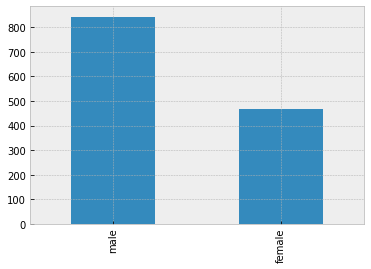

In [35]:
df_total.Sex.value_counts().plot(kind='bar')
plt.show()

In [36]:
df_total.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

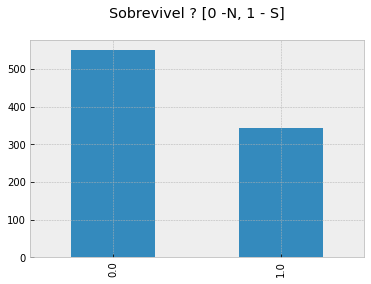

In [37]:
df_total.Survived.value_counts().plot(kind='bar', title='Sobrevivel ? [0 -N, 1 - S]\n')
plt.show()

In [38]:
df_total.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [39]:
df_total.loc[df_total['Title']=='Mlle', 'Title']

641    Mlle
710    Mlle
Name: Title, dtype: object

In [40]:
df_total.loc[df_total['Title']=='Mlle', 'Title']='Miss'.strip()

In [47]:
df_total.loc[df_total['Title']=='Miss', 'Title']

2       Miss
10      Miss
11      Miss
14      Miss
22      Miss
        ... 
1293    Miss
1299    Miss
1300    Miss
1301    Miss
1303    Miss
Name: Title, Length: 264, dtype: object

In [46]:
df_total[df_total.Title == 'Ms'].Title

Series([], Name: Title, dtype: object)

In [45]:
df_total.loc[df_total.Title == 'Ms', 'Title']='Miss'.strip()

In [48]:
df_total.loc[df_total['Title']=='Ms', 'Title']='Miss'.strip()
df_total.loc[df_total['Title']=='Mme', 'Title']='Mrs'.strip()

In [49]:
tab = df_total.groupby(['Sex', 'Title']).size()
print(tab)

Sex     Title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            264
        Mrs             198
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
dtype: int64


In [50]:
df_total.LastName.unique().shape[0]

875

In [51]:
df_total['total_members'] = df_total.SibSp + df_total.Parch + 1
df_total.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName,total_members
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer),2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina,1


In [52]:
df_total[['Survived', 'total_members']].sort_values(by=["total_members","Survived"]).sample(10)

,Survived,total_members
627,1.0,1
512,1.0,1
453,1.0,2
957,NaN,1
147,0.0,5
924,NaN,4
40,0.0,2
100,0.0,1
1240,NaN,1
1082,NaN,1


In [54]:
df_total[['Survived', 'total_members']].groupby('total_members').count()

,Survived
total_members,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [55]:
df_total[['Survived', 'total_members']].groupby('total_members').sum()

,Survived
total_members,
1,163.0
2,89.0
3,59.0
4,21.0
5,3.0
6,3.0
7,4.0
8,0.0
11,0.0


In [58]:
survivor = df_total[['Survived', 'total_members']].groupby('total_members').mean()
survivor

,Survived
total_members,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


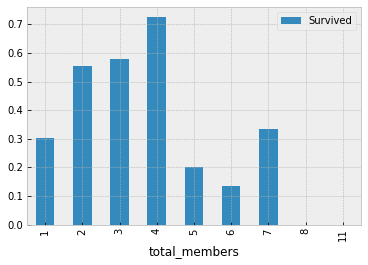

In [59]:
survivor.plot(kind='bar')
plt.show()

In [60]:
df_total.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
Title               0
LastName            0
FirstName           0
total_members       0
dtype: int64

In [61]:
df_total.Ticket.describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [62]:
df_total.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [63]:
df_total.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [64]:
df_total.drop('Cabin', axis=1, inplace=True)
df_total.drop('Ticket', axis=1, inplace=True)
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
811,812,0.0,3,male,39.0,0,0,24.1500,S,Mr,Lester,James,1
1155,1156,NaN,2,male,30.0,0,0,12.7375,C,Mr,Portaluppi,Emilio Ilario Giuseppe,1
1110,1111,NaN,3,male,NaN,0,0,8.0500,S,Mr,Thomson,Alexander Morrison,1


In [66]:
df_total[df_total.Fare.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,NaN,S,Mr,Storey,Thomas,1


In [67]:
df_total[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [68]:
df_total.loc[df_total.PassengerId==1044.0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,NaN,S,Mr,Storey,Thomas,1


In [69]:
df_total.loc[df_total.PassengerId==1044.0, 'Fare']=13.30

In [70]:
df_total.loc[df_total.PassengerId==1044.0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,13.3,S,Mr,Storey,Thomas,1


In [71]:
df_total[df_total['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
61,62,1.0,1,female,38.0,0,0,80.0,NaN,Miss,Icard,Amelie,1
829,830,1.0,1,female,62.0,0,0,80.0,NaN,Mrs,Stone,George Nelson (Martha Evelyn),1


In [72]:
df_total[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [73]:
df_total.loc[df_total['Embarked'].isnull() == True, 'Embarked']='C'.strip()

In [74]:
df_total.Age.isnull().sum()

263

In [75]:
df_total.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

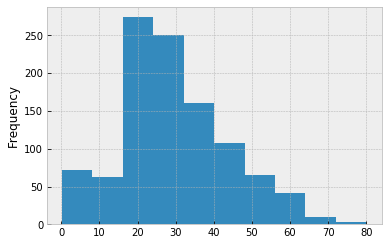

In [76]:
df_total.Age.plot(kind='hist')
plt.show()

In [77]:
pd.pivot_table(df_total, index=['Sex', 'Title', 'Pclass'], values=['Age'], aggfunc=['mean','median','max','min'])

mean median   max    min
                                  Age    Age   Age    Age
Sex    Title        Pclass                               
female Dona         1       39.000000   39.0  39.0  39.00
       Dr           1       49.000000   49.0  49.0  49.00
       Lady         1       48.000000   48.0  48.0  48.00
       Miss         1       30.131148   30.0  63.0   2.00
                    2       20.865714   20.0  50.0   0.92
                    3       17.360874   18.0  45.0   0.17
       Mrs          1       42.926471   45.0  76.0  17.00
                    2       33.518519   30.5  60.0  14.00
                    3       32.326531   31.0  63.0  15.00
       the Countess 1       33.000000   33.0  33.0  33.00
male   Capt         1       70.000000   70.0  70.0  70.00
       Col          1       54.000000   54.5  60.0  47.00
       Don          1       40.000000   40.0  40.0  40.00
       Dr           1       44.750000   47.0  53.0  32.00
                    2       38.500000   38.5  54.0  23.00
       Jonkheer     1       38.000000   38.0  38.0  38.00
       Major        1       48.500000   48.5  52.0  45.00
       Master       1        6.984000    6.0  13.0   0.92
                    2        2.757273    2.0   8.0   0.67
                    3        6.090000    6.0  14.5   0.33
       Mr           1       41.450758   41.5  80.0  17.00
                    2       32.346715   30.0  70.0  14.00
                    3       28.318910   26.0  74.0  11.00
       Rev          2       41.250000   41.5  57.0  27.00
       Sir          1       49.000000   49.0  49.0  49.00

In [78]:
def fillAges(row):
    
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return 29.5
        elif row['Title'] == 'Mrs':
            return 38.0
        elif row['Title'] == 'Dr':
            return 49.0
        elif row['Title'] == 'Lady':
            return 48.0
        elif row['Title'] == 'the Countess':
            return 33.0

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 24.0
        elif row['Title'] == 'Mrs':
            return 32.0

    elif row['Sex']=='female' and row['Pclass'] == 3:
        
        if row['Title'] == 'Miss':
            return 9.0
        elif row['Title'] == 'Mrs':
            return 29.0

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return 4.0
        elif row['Title'] == 'Mr':
            return 36.0
        elif row['Title'] == 'Sir':
            return 49.0
        elif row['Title'] == 'Capt':
            return 70.0
        elif row['Title'] == 'Col':
            return 58.0
        elif row['Title'] == 'Don':
            return 40.0
        elif row['Title'] == 'Dr':
            return 38.0
        elif row['Title'] == 'Major':
            return 48.5

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return 1.0
        elif row['Title'] == 'Mr':
            return 30.0
        elif row['Title'] == 'Dr':
            return 38.5

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 4.0
        elif row['Title'] == 'Mr':
            return 22.0

In [79]:
df_total['Age'] = df_total.apply(lambda s: fillAges(s) if np.isnan(s['Age']) else s['Age'], axis=1)

In [80]:
df_total.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr,Braund,Owen Harris,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer),2
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen,Laina,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle,Jacques Heath (Lily May Peel),2
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr,Allen,William Henry,1
5,6,0.0,3,male,22.0,0,0,8.4583,Q,Mr,Moran,James,1
6,7,0.0,1,male,54.0,0,0,51.8625,S,Mr,McCarthy,Timothy J,1
7,8,0.0,3,male,2.0,3,1,21.0750,S,Master,Palsson,Gosta Leonard,5
8,9,1.0,3,female,27.0,0,2,11.1333,S,Mrs,Johnson,Oscar W (Elisabeth Vilhelmina Berg),3
9,10,1.0,2,female,14.0,1,0,30.0708,C,Mrs,Nasser,Nicholas (Adele Achem),2


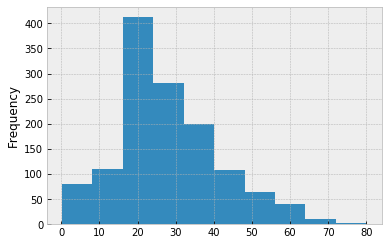

In [81]:
df_total.Age.plot(kind='hist')
plt.show()

In [ ]:
!pip install sklearn

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId      1309 non-null int64
Survived         891 non-null float64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Embarked         1309 non-null object
Title            1309 non-null object
LastName         1309 non-null object
FirstName        1309 non-null object
total_members    1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 183.2+ KB


In [86]:
# Sexo de 0 para 1
def trans_sex(x):
    if x == 'female':
        return 0
    else:
        return 1


# Convert Embarked to 1, 2, 3 (S, C, Q)
def trans_embark(x):
    if x == 'S':
        return 3
    if x == 'C':
        return 2
    if x == 'Q':
        return 1

In [88]:
df_total['Sex'] = df_total['Sex'].apply(trans_sex)

In [89]:
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
69,70,0.0,3,1,26.0,2,0,8.6625,S,Mr,Kink,Vincenz,3
975,976,NaN,2,1,30.0,0,0,10.7083,Q,Mr,Lamb,John Joseph,1
1126,1127,NaN,3,1,20.0,0,0,7.8542,S,Mr,Vendel,Olof Edvin,1


In [95]:
df_total['Embarked'] = df_total['Embarked'].apply(trans_embark)

In [92]:
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
429,430,1.0,3,1,32.0,0,0,8.050,None,Mr,Pickard,Berk (Berk Trembisky),1
110,111,0.0,1,1,47.0,0,0,52.000,None,Mr,Porter,Walter Chamberlain,1
936,937,NaN,3,1,25.0,0,0,7.925,None,Mr,Peltomaki,Nikolai Johannes,1


In [93]:
df_total.Sex.unique()

array([1])

In [96]:
df_total.Embarked.unique()

array([None], dtype=object)

In [97]:
df_total['Child'] = 0

In [98]:
df_total.loc[df_total['Age']<18.0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members,Child
7,8,0.0,3,1,2.0,3,1,21.0750,None,Master,Palsson,Gosta Leonard,5,0
9,10,1.0,2,1,14.0,1,0,30.0708,None,Mrs,Nasser,Nicholas (Adele Achem),2,0
10,11,1.0,3,1,4.0,1,1,16.7000,None,Miss,Sandstrom,Marguerite Rut,3,0
14,15,0.0,3,1,14.0,0,0,7.8542,None,Miss,Vestrom,Hulda Amanda Adolfina,1,0
16,17,0.0,3,1,2.0,4,1,29.1250,None,Master,Rice,Eugene,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1295,NaN,1,1,17.0,0,0,47.1000,None,Mr,Carrau,Jose Pedro,1,0
1299,1300,NaN,3,1,9.0,0,0,7.7208,None,Miss,Riordan,"Johanna Hannah""""",1,0
1300,1301,NaN,3,1,3.0,1,1,13.7750,None,Miss,Peacock,Treasteall,3,0
1301,1302,NaN,3,1,9.0,0,0,7.7500,None,Miss,Naughton,Hannah,1,0


In [99]:
df_total.loc[df_total['Age']<18.0, 'Child'] = 1

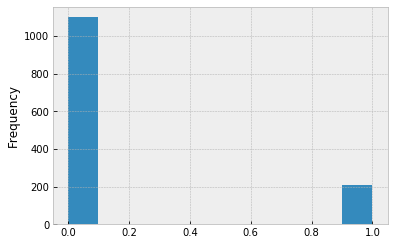

In [100]:
df_total.Child.plot(kind='hist')
plt.show()